#### Importamos librerias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np  

cargamos el df en "data"

In [3]:
data = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
data

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


#### Nos quedamos con los valores mayores al cuantil superior y menores al cuantil menor

In [4]:
df = data.copy()
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


#### Realizamos gráfico de linea del df sin los extremos superior e inferior

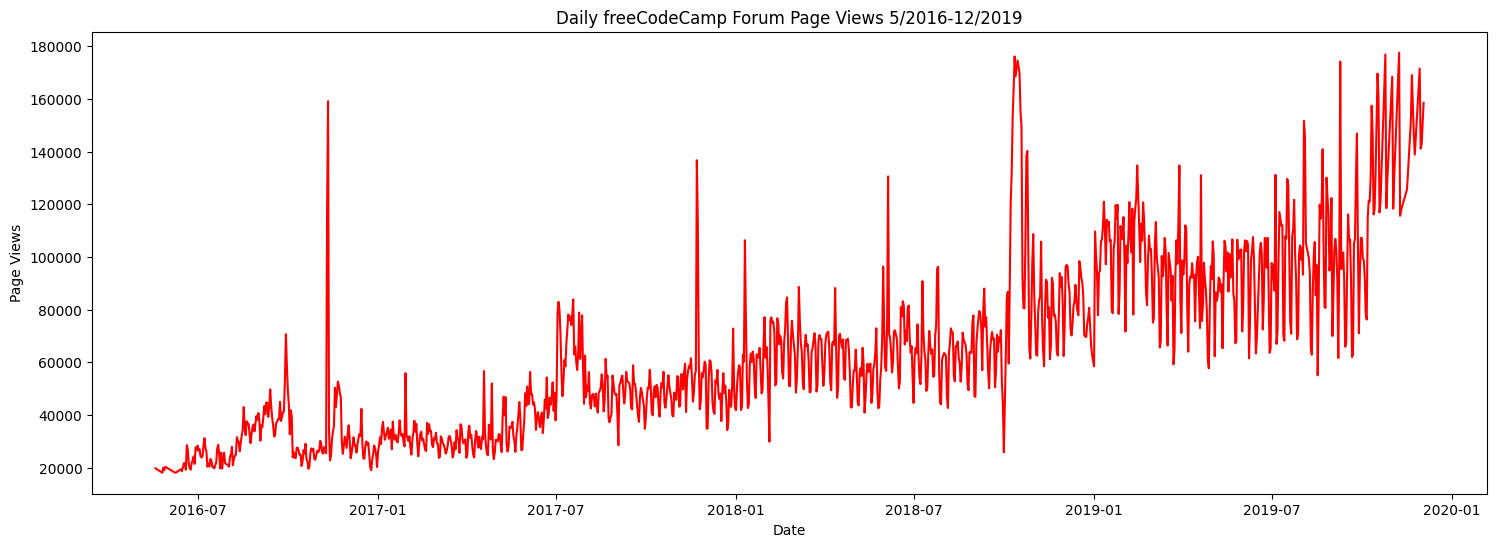

In [5]:
plt.figure(figsize=(18, 6))

g = sns.lineplot(data=df, x='date', y='value', color='red')
g.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

In [ ]:
df_month = data.resample('M').mean().copy()
df_month['Year'] = df_month.index.year
df_month['Month'] = df_month.index.month


C:\Users\elnic\AppData\Local\Temp\ipykernel_1044\2813977030.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = data.resample('M').mean().copy()


,value,Year,Month
date,,,
2016-05-31,11242.695652,2016,5
2016-06-30,19124.366667,2016,6
2016-07-31,23314.225806,2016,7
2016-08-31,31049.193548,2016,8
2016-09-30,41476.866667,2016,9


C:\Users\elnic\AppData\Local\Temp\ipykernel_4596\1773000870.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df.resample('M').mean().copy()


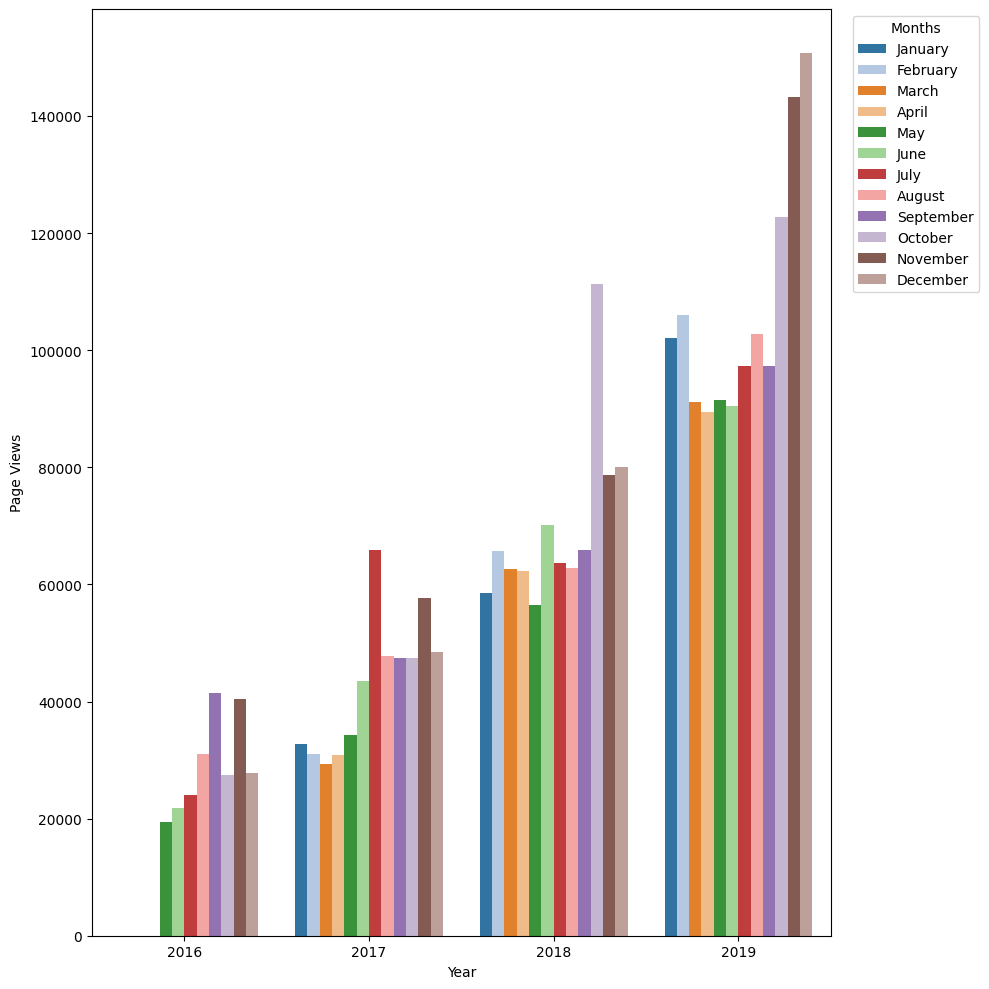

In [14]:
import calendar

df_month = df.resample('M').mean().copy()
df_month['Year'] = df_month.index.year
df_month['Month'] = df_month.index.month
#df_month['Month'] = df_month['Month'].apply(lambda x: calendar.month_name[x])


plt.figure(figsize=(10, 10))
g = sns.barplot(data=df_month, x='Year', y='value', hue='Month', palette='tab20')
plt.xlabel('Year')
plt.ylabel('Page Views')    

handles, labels = g.get_legend_handles_labels()
g.legend(handles, [calendar.month_name[int(x)] for x in labels], title='Months', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

plt.figure(figsize=(10, 10))
g = sns.boxplot(data=df_box, x='year', y='value')
plt.title("Year-wise Box Plot (Trend)")
plt.xlabel("Year")
plt.ylabel("Page Views")
plt.show()

In [17]:
df_box.head(10)

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
5,2016-06-07,18335,2016,Jun
6,2016-06-08,18072,2016,Jun
7,2016-06-09,18139,2016,Jun
8,2016-06-14,19395,2016,Jun
9,2016-06-15,18584,2016,Jun


# Orden correcto de meses (abreviados)
month_order = list(calendar.month_abbr)[1:]  # ['Jan', 'Feb', ..., 'Dec']

# Convertir a categoría ordenada
df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)

plt.figure(figsize=(10, 10))
g = sns.boxplot(data=df_box, x='month', y='value')
plt.title("Month-wise Box Plot (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Page Views")
plt.show()

C:\Users\elnic\AppData\Local\Temp\ipykernel_4596\1027735384.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='year', y='value', ax=axes[0], palette="Set2")
C:\Users\elnic\AppData\Local\Temp\ipykernel_4596\1027735384.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='month', y='value', ax=axes[1], palette="Set3")


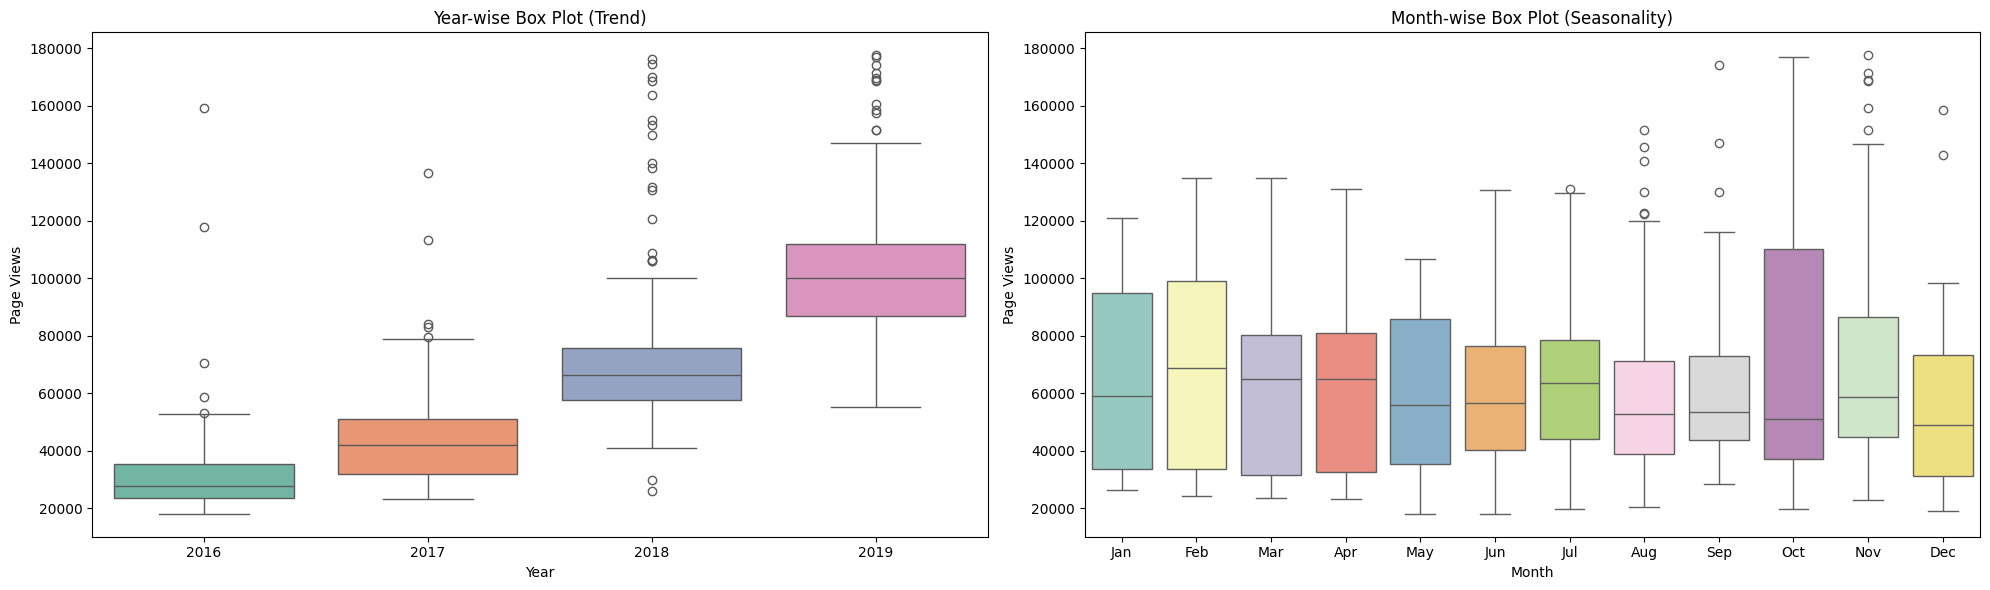

In [19]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Orden correcto de meses
month_order = list(calendar.month_abbr)[1:]
df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)

# Crear figura y ejes
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Boxplot por año
sns.boxplot(data=df_box, x='year', y='value', ax=axes[0], palette="Set2")
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

# Boxplot por mes
sns.boxplot(data=df_box, x='month', y='value', ax=axes[1], palette="Set3")
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

plt.tight_layout()
plt.show()